# ***2022 Student Exit Survey Data Analysis***

---

## Group Members
- Rahul Gandhi​

- Lalith Nandakumar​

- Vrinda​

- Ojas Sharma​

- Sri Harsha Tuttaganti​





# 1. Background and Data Selection:

---

## **1.1 Introduction**

In today’s evolving workforce, understanding the experiences of student employees is essential for fostering a positive, inclusive, and productive work environment. Student workers bring fresh perspectives, and their experiences can offer valuable insights into recruitment practices, workplace satisfaction, and career aspirations. The 2022 Student Exit Survey, conducted by the Treasury Board of Canada Secretariat's Office of the Chief Human Resources Officer, captures these insights by gathering feedback from student employees in the federal public service.

The survey was conducted between **August 2 and September 16, 2022**, with **6,324 students from 74 federal departments and agencies** participating. It aimed to assess various aspects of the student work experience, including hiring and onboarding processes, workplace engagement, career interest in the federal public sector, and overall well-being. The results provide critical data that can be used to improve student employment programs and create a more welcoming environment for future student employees.


## **1.2 Dataset Description**

The dataset[1] is published under the **Open Government License - Canada**, reflecting the government’s commitment to transparency and evidence-based decision-making. It includes survey responses collected over **five years (2018–2022)** from **76 federal departments and agencies**, making it a comprehensive resource for analyzing trends over time. 

With **40,786 rows and 27 columns**, the dataset captures **40 main survey questions**, many of which have sub-questions. These responses are categorized by survey year, department, and demographic details such as **age, gender, and workplace conditions**, allowing for meaningful comparisons across different groups.


**How Data Was Collected**

The **2022 Student Exit Survey** was administered online using **SimpleSurvey**, the corporate survey software. Students employed in federal departments and agencies were invited to participate, and responses were collected digitally to ensure accessibility and ease of analysis.[2]


## **1.3 Dataset Description Table**

The dataset consists of the following important columns:

| Column Name                          | Description |
|--------------------------------------|-------------|
| **`question_order`**                 | Order of the question in the survey. |
| **`level1id`**                       | Unique department code for identification. |
| **`survey_year`**                     | Year when the responses were collected. |
| **`DEPT_E / DEPT_F`**                 | Department name in English and French. |
| **`demcode`**                         | Codes assigned to demographic-related questions. |
| **`BYQUEST / BYCOND`**                | Demographic questions and applied conditions. |
| **`DESCRIP_E / DESCRIP_F`**           | Demographic value labels in English and French. |
| **`question`**                        | Unique question number in the survey. |
| **`TITLE_E / TITLE_F`**               | Survey question text in English and French. |
| **`ANSWER1 - ANSWER7`**               | Percentages for different response options (e.g., Strongly Agree, Disagree, etc.). |
| **`MOST_POSITIVE_OR_LEAST_NEGATIVE`** | Grouped percentage for the most positive responses. |
| **`NEUTRAL_OR_MIDDLE_CATEGORY`**      | Percentage of neutral responses. |
| **`MOST_NEGATIVE_OR_LEAST_POSITIVE`** | Grouped percentage for the least positive responses. |
| **`AGREE`**                           | Percentage of affirmative responses. |
| **`SCORE5 / SCORE100`**               | Average score out of 5 and 100, respectively. |
| **`ANSCOUNT`**                        | Total number of respondents for each question. |


## **1.4 Overview of Survey Questions**

The survey consists of **109** questions, but the dataset focuses on **73** key questions divided into several categories, each assessing different aspects of the job experience.

| Question Number                  | Subparts       | Summary of Questions                                                      |
|----------------------------------|----------------|---------------------------------------------------------------------------|
| 2. Application Process            | 3 (2a, 2b, 2c) | Clarity and accessibility of job application process and available job information. |
| 3. Reasons for Accepting the Job  | 10 (3a – 3j)   | Factors influencing job acceptance, such as experience, location, networking, salary, and telework opportunities. |
| 4. Interview Process              | 5 (4c – 4g)    | Satisfaction with interview timing, job information, and interviewer conduct. |
| 5. Onboarding and Orientation     | 6 (5b – 5g)    | Experience with welcome process, IT setup, job orientation, and organizational introduction. |
| 6. Awareness of Events            | 1 (6)          | Whether managers informed students about orientation or networking events. |
| 7. Work Experience                | 15 (7a – 7o)   | Job satisfaction, team integration, meaningful work, supervision, and overall experience. |
| 8. Work Structure                 | 7 (8a – 8g)    | Clarity of work plans, tasks, feedback, and understanding of department functions. |
| 9. Accommodation                  | 1 (9e)         | Satisfaction with accommodations for individual needs.                     |
| 10. Telework Experience           | 3 (10b – 10d)  | Remote work conditions, technical support, and team engagement in virtual meetings. |
| 11. Health and Safety             | 3 (11a – 11c)  | Physical and mental well-being support from supervisors.                   |
| 12. Future Employment             | 5 (12a – 12e)  | Job's impact on future employment prospects and interest in federal service careers. |
| 13. Factors Influencing Job Selection | 12 (13a – 13l) | Factors influencing job selection, including salary, job security, work-life balance, and telework options. |
| 14. Pay System Issues             | 2 (14a – 14b)  | Experience with pay system issues and resolution support.                  |
| **Total Questions**               | **73**         |                                                                           

## **1.5 Significance of the Dataset**

This dataset is a valuable tool for **human resources professionals, researchers, and policymakers** seeking to improve the student employment experience in the federal public service. By analyzing student feedback, stakeholders can **identify key trends, evaluate policies, and improve workplace conditions** for future student workers.

The data provides insights that can help refine **hiring practices, strengthen onboarding procedures, and address workplace challenges**, ultimately creating a more **inclusive and supportive work environment**. With a detailed breakdown of student perspectives, this dataset plays a crucial role in shaping future employment programs and ensuring that student employees feel valued and engaged in the public service.

​

# 2. Preliminary Data Analysis (EDA)

---

## **2.1 Data Processing**

### 2.1.1 Handling Missing Values
The first step in data processing was identifying and handling **missing values** and **999 placeholder values** to ensure the accuracy and reliability of the analysis. Additionally, **columns not used for analysis** and those containing **French descriptions** were removed.

### 2.1.2 Data Type Validation
The data types of each column were examined to confirm they were correctly assigned:
- **Numerical columns** were validated for proper format.
- **Categorical columns** were checked for consistency.


By completing these steps, the dataset was thoroughly **cleaned, processed, and prepared** for further statistical analysis.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (CSV only)
file_path = "./content/data_s.csv"
df_original = pd.read_csv(file_path)

# Convert SCORE100 to numeric and remove invalid values (999)
df_original['SCORE100'] = pd.to_numeric(df_original['SCORE100'], errors='coerce')
df_original = df_original[df_original['SCORE100'] != 999].dropna(subset=['SCORE100'])

# Remove French columns (ending in '_F')
data_cleaned = df_original.drop(columns=[col for col in df_original.columns if col.endswith('_F')], errors='ignore')



## **2.2 Best Province for Skill Development & Networking: A Comparative Analysis**

**Methodology:**

- Extracted responses on skill-building and career networking opportunities.
- Isolated data for Canadian provinces, excluding international responses.
- Calculated average skill development scores per province.
- Applied normalization to ensure fair comparisons across regions.

Summary Statistics:
          surveyyear       answer1  most positive or least negative  \
count  27488.000000  27488.000000                     27488.000000   
mean    2021.196668     51.934881                        98.053514   
std        1.280456     20.003006                       132.998340   
min     2018.000000      0.000000                         0.000000   
25%     2021.000000     39.000000                        72.000000   
50%     2022.000000     54.000000                        84.000000   
75%     2022.000000     68.000000                        91.000000   
max     2022.000000    100.000000                       999.000000   

       neutral or middle category  most negative or least positive  \
count                27488.000000                     27488.000000   
mean                    58.617106                        32.381257   
std                    215.475515                       142.071513   
min                      0.000000                         0.000000  

/var/folders/v0/7jgd2d892z755l_wfs180km80000gn/T/ipykernel_15055/1680895546.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=province_skill_scores[metric], y=province_skill_scores['descrip_e'], palette='coolwarm')


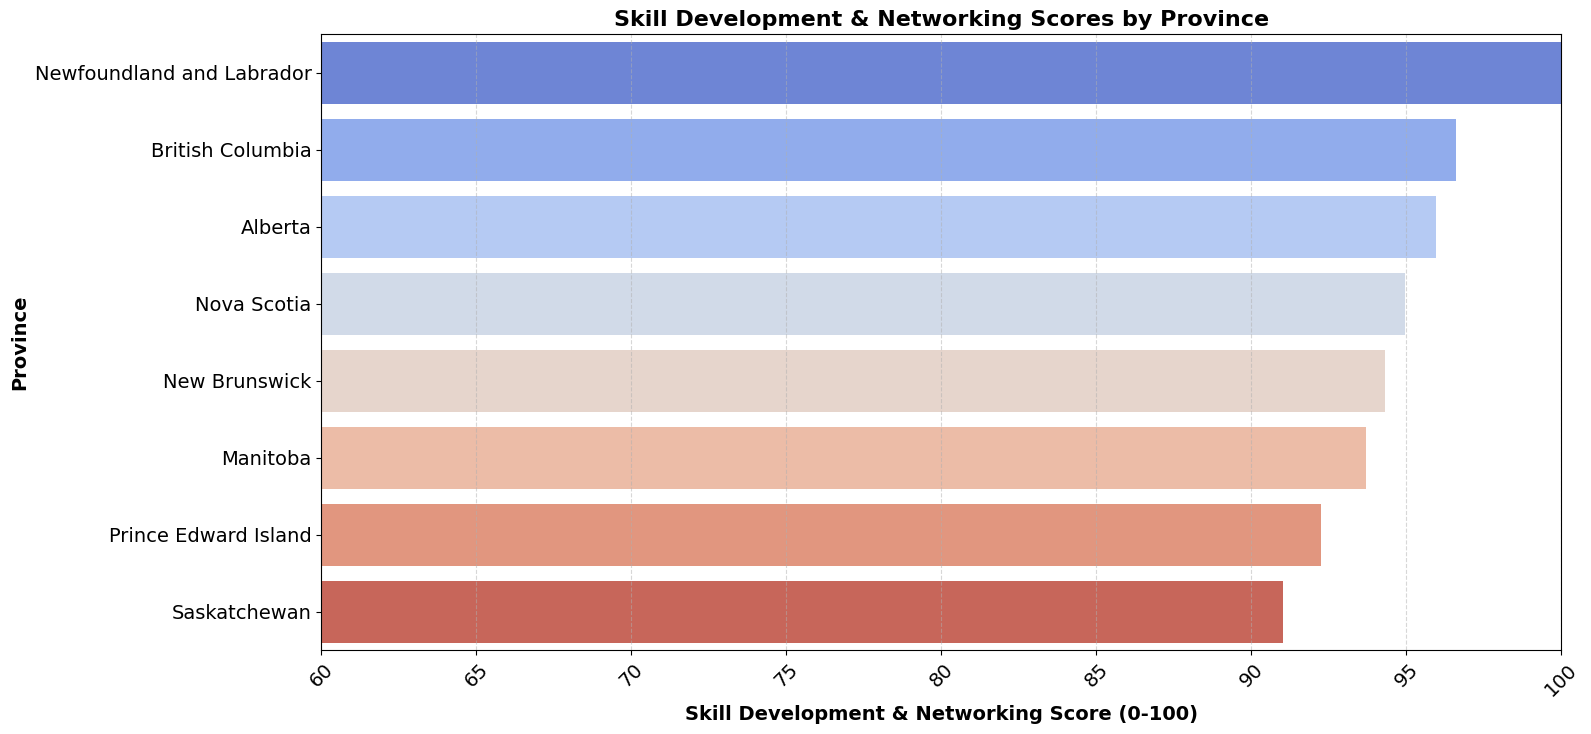

In [2]:

df = data_cleaned.copy(deep=True)

# Standardize column names
df.columns = df.columns.str.strip().str.lower()


# Perform basic Exploratory Data Analysis (EDA)
print("Summary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())
print("\nUnique Values in Categorical Columns:\n", df.select_dtypes(include=['object']).nunique())

# Define relevant metric
metric = 'score100'

# Define Canadian provinces and territories (excluding Yukon)
canadian_regions = [
    "Alberta", "British Columbia", "Manitoba", "New Brunswick", "Newfoundland and Labrador", 
    "Nova Scotia", "Ontario", "Prince Edward Island", "Quebec", "Saskatchewan", 
    "Northwest Territories", "Nunavut"
]

# Identify relevant questions for skill development & networking
relevant_questions = ['Q3c', 'Q12a', 'Q12b', 'Q13b']
skill_networking_responses = df[df['question'].isin(relevant_questions)]

# Filter only Canadian provinces for comparison (dropping Yukon)
skill_networking_provinces = skill_networking_responses[skill_networking_responses['descrip_e'].isin(canadian_regions)]

# Convert relevant column to numeric
skill_networking_provinces.loc[:, metric] = pd.to_numeric(skill_networking_provinces[metric], errors='coerce')


# Compute mean score per province
province_skill_scores = skill_networking_provinces.groupby('descrip_e')[metric].mean().reset_index()

# Normalize scores to fit within 100
province_skill_scores[metric] = (province_skill_scores[metric] / province_skill_scores[metric].max()) * 100

# Sort provinces by score
province_skill_scores = province_skill_scores.sort_values(by=metric, ascending=False)

# Visualization
plt.figure(figsize=(16, 8))  # Adjust figure size
sns.barplot(x=province_skill_scores[metric], y=province_skill_scores['descrip_e'], palette='coolwarm')

# Titles and labels
plt.xlabel("Skill Development & Networking Score (0-100)", fontsize=14, fontweight='bold')
plt.ylabel("Province", fontsize=14, fontweight='bold')
plt.title("Skill Development & Networking Scores by Province", fontsize=16, fontweight='bold')

# Set x-axis from 60 to 100 with intervals of 5
min_score = 60
max_score = 100
plt.xlim(min_score, max_score)
plt.xticks(np.arange(min_score, max_score + 5, 5), fontsize=14, rotation=45)  # Increase interval and rotate labels
plt.yticks(fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Display plot
plt.show()


**Key Findings:-**

- Top 3 provinces for skill development & networking:

    - Newfoundland & Labrador
    - British Columbia
    - Alberta

- Lowest-scoring province: Saskatchewan
- Overall provincial differences were moderate, suggesting relatively balanced opportunities across regions.
- Normalization ensured fair comparisons, preventing skewed interpretations due to regional sample size variations.
- Future research could examine sector-specific skill development trends within provinces.

**Challenges & Limitations:-**
- While normalization allowed for fair ranking, actual employment opportunities vary by industry within each province.
- Survey bias: Responses are self-reported, which may introduce subjective variations.

## **2.3 Comparing Hiring Prospects: National vs. International Students**

**Methodology:**

- Filtered survey responses related to employment programs (e.g., CO-OP, FSWEP).
- Grouped students into national and international categories.
- Computed average hiring scores for both groups and analyzed differences.


Average Hiring Scores:
National Students: 76.92
International Students: 77.97


/var/folders/v0/7jgd2d892z755l_wfs180km80000gn/T/ipykernel_15055/2018412974.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  national_students[available_hiring_metrics] = national_students[available_hiring_metrics].apply(pd.to_numeric, errors='coerce')
/var/folders/v0/7jgd2d892z755l_wfs180km80000gn/T/ipykernel_15055/2018412974.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  international_students[available_hiring_metrics] = international_students[available_hiring_metrics].apply(pd.to_numeric, error

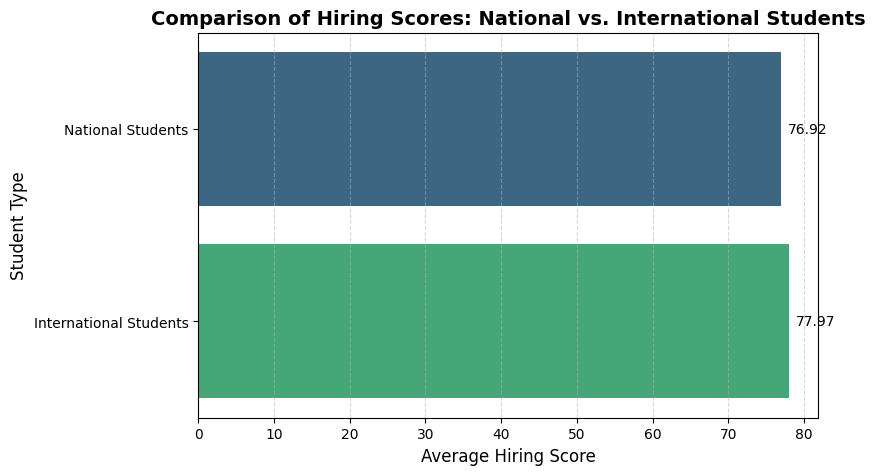

In [3]:

df = data_cleaned.copy(deep=True)

# Standardize column names
df.columns = df.columns.str.strip().str.lower()

# Define relevant hiring metrics
hiring_metrics = ['most_positive_or_least_negative', 'agree', 'score100']

# Check if all columns exist before applying calculations
missing_columns = [col for col in hiring_metrics if col not in df.columns]
if missing_columns:
    print(f"Warning: The following columns are missing and will be skipped: {missing_columns}")

# Define Canadian provinces and territories
canadian_regions = [
    "Alberta", "British Columbia", "Manitoba", "New Brunswick", "Newfoundland and Labrador", 
    "Nova Scotia", "Ontario", "Prince Edward Island", "Quebec", "Saskatchewan", 
    "Northwest Territories", "Nunavut", "Yukon"
]

# Identify national and international students based on `descrip_e`
national_students = df[df['descrip_e'].str.contains('|'.join(canadian_regions), case=False, na=False)]
international_students = df[~df['descrip_e'].str.contains('|'.join(canadian_regions), case=False, na=False)]

# Only use available columns for numerical conversion
available_hiring_metrics = [col for col in hiring_metrics if col in df.columns]
national_students[available_hiring_metrics] = national_students[available_hiring_metrics].apply(pd.to_numeric, errors='coerce')
international_students[available_hiring_metrics] = international_students[available_hiring_metrics].apply(pd.to_numeric, errors='coerce')

# Compute mean hiring score per student type
national_hiring_score = national_students[available_hiring_metrics].mean().mean()
international_hiring_score = international_students[available_hiring_metrics].mean().mean()

# Print comparison
print("\nAverage Hiring Scores:")
print(f"National Students: {national_hiring_score:.2f}")
print(f"International Students: {international_hiring_score:.2f}")

# Improved visualization with clearer labels and better formatting
hiring_scores = pd.DataFrame({
    "Student Type": ["National Students", "International Students"],
    "Average Hiring Score": [national_hiring_score, international_hiring_score]
})

hiring_scores = pd.DataFrame({
    "Student Type": ["National Students", "International Students"],
    "Average Hiring Score": [national_hiring_score, international_hiring_score]
})

# Create a better-styled bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Average Hiring Score", y="Student Type", data=hiring_scores, palette="viridis")

# Add values on top of the bars with two decimal places
for index, row in hiring_scores.iterrows():
    ax.text(row['Average Hiring Score'] + 1, index, f"{row['Average Hiring Score']:.2f}", color='black', ha="left", va="center", fontsize=10)

# Titles and labels
plt.xlabel("Average Hiring Score", fontsize=12)
plt.ylabel("Student Type", fontsize=12)
plt.title("Comparison of Hiring Scores: National vs. International Students", fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Display plot
plt.show()




**Key Findings:-**

- International students had a slightly higher hiring score (77.69) compared to national students (75.67).
- While the difference is not highly significant, it suggests that international students might have a slight edge in securing employment.
- Potential influencing factors include:
    - Networking opportunities
    - Previous work experience
    - Employer preferences

- Future research could further explore employer selection criteria, visa policies, and job market demand for international students.

**Challenges & Limitations:-**
- Limited hiring metrics: The survey does not account for external hiring barriers such as visa restrictions for international students.
- Survey bias: Responses are self-reported, which may introduce subjective variations.

## **2.4 Correlation Matrix: Onboarding Experience vs. Career Intent (Q12d)**

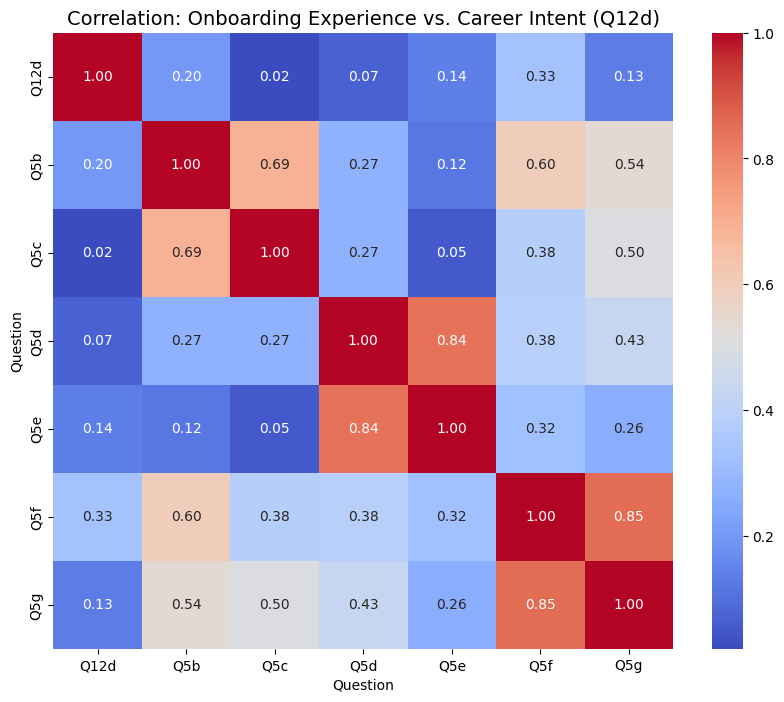

In [4]:

# Select onboarding questions and Q12d (career intent)  
onboarding_questions = ['Q5b', 'Q5c', 'Q5d', 'Q5e', 'Q5f', 'Q5g']  
df_corr = data_cleaned[data_cleaned['Question'].isin(onboarding_questions + ['Q12d'])]  

# Pivot and calculate correlations  
corr_matrix = df_corr.pivot_table(  
    index='DEPT_E',  
    columns='Question',  
    values='SCORE100'  
).corr()  

# Plot heatmap  
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')  
plt.title('Correlation: Onboarding Experience vs. Career Intent (Q12d)', fontsize=14)  
plt.show()  

**Key Findings**  

**Onboarding Experience (Q5b-Q5g) and Career Intent (Q12d)**:  
   - **Strongest Positive Link**:  
     - **Q5f** (*"Overall orientation about the work I would be doing"*) shows a **moderate correlation (0.33)** with Q12d. This suggests employees who received clearer job-specific orientation are more likely to consider a federal career.  
   - **Weakest Links**:  
     - **Q5c** (*"Welcome from colleagues"*): Near-zero correlation (**0.02**), indicating minimal impact on career intent.  
     - **Q5d** (*"Materials/equipment provided"*: **0.07**) and **Q5g** (*"Overall orientation about the organization"*: **0.13**) also show negligible relationships.  
   - **Notable Weak Correlations**:  
     - **Q5b** (*"Welcome from supervisor/manager"*: **0.20**) and **Q5e** (*"IT infrastructure access"*: **0.14**) are slightly stronger but still weak.  


While most onboarding factors show limited direct ties to career intent, job-specific orientation (Q5f) stands out as a meaningful driver. 

# 3. Statistical Hypotheses / Problem Formulation

---

**Sampling**

This section presents an analysis of the job onboarding survey data, focusing on the **SCORE100** metric. The objective is to evaluate the **average onboarding experience** across different federal departments by comparing **SCORE100 ratings**. The analysis includes the **top five departments** with the highest recorded **ANSCOUNT** (total response count).  


## **3.1 Data Preparation & Methodology**

**Data Filtering**
- The dataset was **filtered** to include only records where the **TITLE_E** begins with the digit **"5"** which contains questions related to Onboarding and Orientation.
- The total count of responses (**ANSCOUNT**) per department was **aggregated**, and the **top five departments** with the highest response counts were selected for analysis.  
- The **SCORE100** variable was **converted to numeric values**, with special values (e.g., **999**) excluded, and any missing values **dropped**.  

## **3.2 Stratified Sampling**
- The data was **stratified by department** (**DEPT_E**) to ensure the analysis reflected **departmental proportions**.  
- A **target sample size of 5000** was allocated to each department **proportionally** based on its size in the original dataset.  
- **Stratified sampling** was performed (**with replacement when necessary**) to obtain the required sample sizes for each department.  

**Statistical Calculations**
For each department, the following key statistics were computed:  

- **Mean SCORE100**  
- **Standard Deviation (std)**  
- **Count (number of observations)**  
- **Standard Error (SE):** Calculated as:  
  \[
  SE = \frac{\text{Standard Deviation}}{\sqrt{\text{Sample Count}}}
  \]
- **95% Confidence Intervals (CI):** Using a **Z-score of 1.96**, the **lower** and **upper** bounds of the CI were computed as:  
  \[
  CI_{lower} = \text{Mean} - (1.96 \times SE)
  \]
  \[
  CI_{upper} = \text{Mean} + (1.96 \times SE)
  \]


In [5]:
data = data_cleaned.copy(deep=True)

#preprocess
data = data[data['TITLE_E'].apply(lambda x: str(x).startswith(('5')))]  #the queatsions 5 has job onboarding questions

department_anscount_sums = data.groupby('DEPT_E')['ANSCOUNT'].sum()
top_5_departments = department_anscount_sums.nlargest(5).index  #this gives top highly counted survy polls
data = data[data['DEPT_E'].isin(top_5_departments)]

data['SCORE100'] = pd.to_numeric(data['SCORE100'], errors='coerce')
data = data[data['SCORE100'] != 999]                                #harsha part -.-
data = data.dropna(subset=['SCORE100'])


#stratify
stratums = data.groupby('DEPT_E')
ntotal = 5000


proportions = stratums.size() / len(data)
nstrat = (proportions * ntotal).round().astype(int)

stra_sample = pd.concat([
    stratum.sample(n=n, random_state=42, replace=True if n > len(stratum) else False)  #strat sampling
    for (category, stratum), n in zip(stratums, nstrat)
])

dept_stats = stra_sample.groupby('DEPT_E')['SCORE100'].agg(['mean', 'std', 'count'])
dept_stats['standard_error'] = dept_stats['std'] / np.sqrt(dept_stats['count'])

Z = 1.96
dept_stats['CI_lower'] = dept_stats['mean'] - Z * dept_stats['standard_error']  #conf int
dept_stats['CI_upper'] = dept_stats['mean'] + Z * dept_stats['standard_error']


meanstrat = stra_sample['SCORE100'].mean()
stdstrat = stra_sample['SCORE100'].std()


print('Stratified Average (Overall):', meanstrat)
print('Stratified Standard Deviation (Overall):', stdstrat)

print('\nDepartment-wise Statistics with 95% Confidence Intervals:')
print(dept_stats)


Stratified Average (Overall): 82.3361072214443
Stratified Standard Deviation (Overall): 9.595569837873686

Department-wise Statistics with 95% Confidence Intervals:
                                           mean        std  count  \
DEPT_E                                                              
Canada Border Services Agency (CBSA)  79.458824   7.926046     85   
Canada Revenue Agency (CRA)           84.968235   6.410598     85   
Department of National Defence (DND)  78.500000   9.818205     85   
Parks Canada (PC)                     80.479167  10.261111     72   
Public Service (PS)                   82.438977   9.628592   4672   

                                      standard_error   CI_lower   CI_upper  
DEPT_E                                                                      
Canada Border Services Agency (CBSA)        0.859700  77.773811  81.143836  
Canada Revenue Agency (CRA)                 0.695327  83.605394  86.331076  
Department of National Defence (DND)       

**Results**

**Overall Stratified Sample:**
- **Stratified Average (Overall):** 82.34  
- **Stratified Standard Deviation (Overall):** 9.60  

**Department-wise Statistics:**

| Department                                  | Mean  | Std  | Count | Standard Error | 95% CI Lower | 95% CI Upper |
|---------------------------------------------|-------|------|-------|----------------|--------------|--------------|
| **Canada Border Services Agency (CBSA)**   | 79.46 | 7.93 | 85    | 0.86           | 77.77        | 81.14        |
| **Canada Revenue Agency (CRA)**            | 84.97 | 6.41 | 85    | 0.70           | 83.61        | 86.33        |
| **Department of National Defence (DND)**   | 78.50 | 9.82 | 85    | 1.06           | 76.41        | 80.59        |
| **Parks Canada (PC)**                      | 80.48 | 10.26| 72    | 1.21           | 78.11        | 82.85        |
| **Public Service (PS)**                    | 82.44 | 9.63 | 4672  | 0.14           | 82.16        | 82.72        |


**Limitations and Future Extensions**

**Sample Representation**
The **stratified sampling approach** ensured proportional representation, but **departments with smaller sample sizes** (e.g., **PC** and **DND**) may have **less stable estimates** due to higher variability.

**Further Analysis**
Future research could explore additional factors influencing **SCORE100 ratings**, such as:  
- **Tenure** (length of employment)  
- **Job Role or Position**  
- **Geographic Region**  
- **Trends Over Time** (yearly comparisons)

**Conclusion**
This analysis provides valuable insights into the **job onboarding experience** across **five major federal departments** using a **stratified sampling approach**.  

- **Overall, onboarding experiences were rated positively**, with an **average SCORE100 of 82.34**.  
- However, **departmental differences** highlight areas for potential **targeted improvements**, particularly within the **Department of National Defence (DND)**, which had the **lowest average rating**.

These findings can help inform **policy improvements** and **enhance onboarding processes** for future student employees.


## 3.3 One-Way ANOVA: Evaluating the Impact of Age on Work Structure Perception

### What is ANOVA?
ANOVA, or Analysis of Variance, is a statistical technique that determines if there are significant differences among the means of three or more independent groups. Essentially, it tests whether at least one group mean deviates significantly from the others.

### Why Use ANOVA?
- **Multiple Group Comparison:**  
  ANOVA allows us to compare several groups at once, which avoids the pitfalls of running multiple t-tests that can inflate the risk of Type I errors.
- **Robust Analysis:**  
  By considering both the variability within each group and between different groups, ANOVA provides a comprehensive picture of group differences.
- **Our Application:**  
  In our analysis, we used one-way ANOVA to examine the differences in work structure perception scores across various age cohorts.

### Age Group Categories
Our study segmented respondents into the following age groups:
- 19 years and under
- 20-21 years
- 22-23 years
- 24-25 years
- 26-27 years
- 28-29 years
- 30 years and over

### Conditions for Valid ANOVA Testing
Before performing the ANOVA, we ensured that key assumptions were met:
- **Normality:** We conducted Shapiro-Wilk tests for each age group to verify that the data follows a normal distribution.
- **Homogeneity of Variance:** Levene’s test was used to confirm that the variances across all age groups are similar.
- **Tukey’s HSD Post-hoc Test:** Conducted if ANOVA results were significant, to identify which specific age groups differed.

Meeting these conditions is crucial to validate our ANOVA results and ensure reliable conclusions.

### **Hypotheses Test**  

- **Null Hypothesis (H₀):** There is no significant difference in work structure perception scores among different age groups.
- **Alternative Hypothesis (H₁):** There is a significant difference in work structure perception scores among different age groups.

Shapiro-Wilk Test for 19 years and under: p-value = 0.6705
Shapiro-Wilk Test for 20-21 years: p-value = 0.6787
Shapiro-Wilk Test for 22-23 years: p-value = 0.6541
Shapiro-Wilk Test for 24-25 years: p-value = 0.2233
Shapiro-Wilk Test for 26-27 years: p-value = 0.6761
Shapiro-Wilk Test for 28-29 years: p-value = 0.6190
Shapiro-Wilk Test for 30 years and over: p-value = 0.4050

Levene’s Test for Equal Variance: p-value = 0.9876

ANOVA Results: F-statistic = 0.3391, p-value = 0.9122


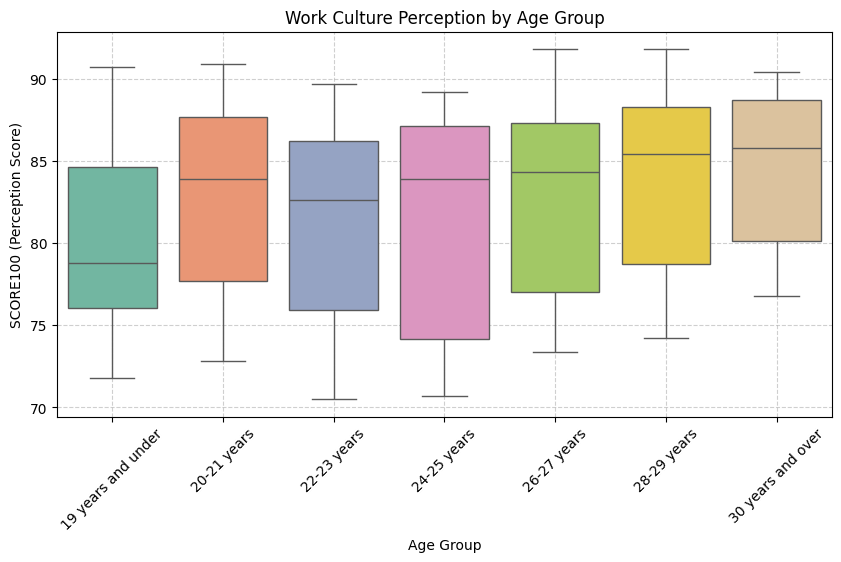

In [6]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = data_cleaned.copy(deep=True)

#preprocess
data = data[data['TITLE_E'].apply(lambda x: str(x).startswith('8'))]   #takes the questions of '8' which is about Work Stucture
age_groups = ["30 years and over", "28-29 years", "20-21 years", "26-27 years", "24-25 years", "22-23 years", "19 years and under"]

#filter data based on age group demographics and year
data = data[(data['DESCRIP_E'].isin(age_groups)) & (data['surveyyear']==2022)] 



# Extract Age Group and Work Culture Score
age_groups = data["DESCRIP_E"]
scores = data["SCORE100"]

# **Step 1: Check Normality (Shapiro-Wilk Test)**
for group in data["DESCRIP_E"].unique():
    stat, p_value = stats.shapiro(data[data["DESCRIP_E"] == group]["SCORE100"])
    print(f"Shapiro-Wilk Test for {group}: p-value = {p_value:.4f}")

# **Step 2: Check Homogeneity of Variance (Levene’s Test)**
levene_stat, levene_p = stats.levene(*[group["SCORE100"].values for _, group in data.groupby("DESCRIP_E")])
print(f"\nLevene’s Test for Equal Variance: p-value = {levene_p:.4f}")

# **Step 3: Perform One-Way ANOVA**
anova_stat, anova_p = stats.f_oneway(*[group["SCORE100"].values for _, group in data.groupby("DESCRIP_E")])
print(f"\nANOVA Results: F-statistic = {anova_stat:.4f}, p-value = {anova_p:.4f}")

# **Step 4: Perform Post-hoc Test if ANOVA is Significant**
if anova_p < 0.05:
    tukey_results = pairwise_tukeyhsd(scores, age_groups, alpha=0.05)
    print("\nTukey’s HSD Post-hoc Test:\n", tukey_results)

# **Step 5: Visualize the Results**
plt.figure(figsize=(10, 5))
sns.boxplot(x="DESCRIP_E", y="SCORE100", data=data, hue="DESCRIP_E", palette="Set2", dodge=False)
plt.xticks(rotation=45)
plt.title("Work Culture Perception by Age Group")
plt.xlabel("Age Group")
plt.ylabel("SCORE100 (Perception Score)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend([], [], frameon=False)
plt.show()

### Summary of Findings

- **Normality Check:**  
  Each age group's data was tested with the Shapiro-Wilk method, and all p-values (ranging from 0.2233 to 0.6787) are well above the 0.05 mark. This indicates that the data for each group follows a normal distribution.

- **Variance Consistency:**  
  Levene’s test returned a p-value of 0.9876, which confirms that the variability across different age groups is consistent.

- **Group Comparison:**  
  The ANOVA test yielded an F-statistic of 0.3391 with a p-value of 0.9122. This high p-value suggests that there is no significant difference in work structure perception scores among the age groups.

**In essence:**  
Our data comfortably meets the assumptions required for ANOVA. However, the analysis indicates that differences in work structure perceptions across various age groups are not statistically significant, implying that age does not play a key role in shaping these perceptions within our sample.


## **3.4 ANOVA test for Onboarding and Orientation for 5 Departments**

### **Problem Statement**
This analysis examines whether the **mean scores (SCORE100)** for survey responses on the **Q5 series** differ among selected federal departments in the **2022 survey year**. The departments included in the study are:  
- **Public Service (PS)**  
- **Canada Revenue Agency (CRA)**  
- **Parks Canada (PC)**  
- **Canada Border Services Agency (CBSA)** 
- **Department of National Defence (DND)**  


### **Hypotheses**
- **Null Hypothesis (H₀):** There are **no differences** in the mean **SCORE100** among the departments for each Q5 question.  
- **Alternative Hypothesis (H₁):** At least **one department** has a **significantly different** mean **SCORE100** from the others.  

Investigating differences across departments helps determine whether **employee experiences** related to the **Q5 items** (e.g., **Job satisfaction, team integration, meaningful work, supervision, and overall experience.**) are **consistent** or if **department-specific variations** exist that might require **targeted interventions**.


In [7]:
from scipy.stats import levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = data_cleaned.copy(deep=True)
# filter 2022 Q5 data for selected departments (all Q5 questions)
q5_data_2022 = df[(df['surveyyear'] == 2022) &
                (df['Question'].str.startswith('Q5')) &  # Select all questions starting with 'Q5'
                (df['DEPT_E'].isin(['Public Service (PS)', 'Canada Revenue Agency (CRA)',
         'Parks Canada (PC)', 'Canada Border Services Agency (CBSA)',
         'Department of National Defence (DND)']))]

# group data by question for separate analysis
for question, group_data in q5_data_2022.groupby('Question'):
    print(f"\nAnalysis for Question: {question}")

    anova_stat, anova_p = f_oneway(*[group_data[group_data['DEPT_E'] == dept]['SCORE100']
                                    for dept in group_data['DEPT_E'].unique()])
    print(f"ANOVA Results: F-stat={anova_stat:.2f}, p={anova_p:.4f}")

    tukey = pairwise_tukeyhsd(group_data['SCORE100'], group_data['DEPT_E'])
    print(tukey.summary())


Analysis for Question: Q5b
ANOVA Results: F-stat=0.05, p=0.9950
                               Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
               group1                               group2                meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------------------------------------------
Canada Border Services Agency (CBSA)          Canada Revenue Agency (CRA)      4.2  0.997 -29.4362 37.8362  False
Canada Border Services Agency (CBSA) Department of National Defence (DND)      3.4 0.9987 -30.2362 37.0362  False
Canada Border Services Agency (CBSA)                    Parks Canada (PC)      2.1 0.9998 -31.5362 35.7362  False
Canada Border Services Agency (CBSA)                  Public Service (PS)   1.2634 0.9999 -22.5708 25.0977  False
         Canada Revenue Agency (CRA) Department of National Defence (DND)     -0.8    1.0 -34.4362 32.8362  False
         Canada Revenue

### Summary of Findings
For all the **Q5 questions analyzed** (**Q5b through Q5g**), the **ANOVA tests** yielded **p-values above** the conventional **significance threshold (0.05)**:

| **Q5 Question** | **p-value** |
|---------------|------------|
| Q5b | 0.9950 |
| Q5c | 0.9911 |
| Q5d | 0.6175 |
| Q5e | 0.0815 |
| Q5f | 0.8862 |
| Q5g | 0.8254 |

Since **all p-values exceed 0.05**, we **fail to reject the null hypothesis**—meaning that **no statistically significant differences** exist among the departments' **mean scores** for these questions in the **2022 data**.

Additionally, the **Tukey HSD post-hoc test** confirmed that **all pairwise differences** between departments were **non-significant** (**all "reject" = False**). In other words, **no department pair exhibited notably different average scores** for these **Q5 items**.

### **Key Takeaway:**
There is **no significant difference** in the **job onboarding experience** across the surveyed departments, suggesting that student employees generally had **similar perceptions** of the process.


## **3.5 ANOVA test for Job Satisfaction for 5 Departments**

### **Problem Statement**
This analysis examines whether the **mean scores (SCORE100)** for survey responses on the **Q7 series** differ among selected federal departments in the **2022 survey year**. The departments included in the study are:  
- **Public Service (PS)**  
- **Canada Revenue Agency (CRA)**  
- **Parks Canada (PC)**  
- **Canada Border Services Agency (CBSA)**  
- **Department of National Defence (DND)**  


### **Hypotheses**
- **Null Hypothesis (H₀):** There are **no differences** in the mean **SCORE100** among the departments for each Q7 question.  
- **Alternative Hypothesis (H₁):** At least **one department** has a **significantly different** mean **SCORE100** from the others.  

Investigating differences across departments helps determine whether **employee experiences** related to the **Q7 items** (e.g., **Job satisfaction, team integration, meaningful work, supervision**) are **consistent** or if **department-specific variations** exist that might require **targeted interventions**. are **consistent** or if **department-specific variations** exist that might require **targeted interventions**.


In [8]:
from scipy.stats import levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df  = data_cleaned.copy(deep=True)
# Filter 2022 Q7 data for selected departments (all Q7 questions)
q5_data_2022 = df[(df['surveyyear'] == 2022) &
                (df['Question'].str.startswith('Q7')) &  # Select all questions starting with 'Q7'
                (df['DEPT_E'].isin(['Public Service (PS)', 'Canada Revenue Agency (CRA)',
         'Parks Canada (PC)', 'Canada Border Services Agency (CBSA)',
         'Department of National Defence (DND)']))]

for question, group_data in q5_data_2022.groupby('Question'):
    print(f"\nAnalysis for Question: {question}")

    anova_stat, anova_p = f_oneway(*[group_data[group_data['DEPT_E'] == dept]['SCORE100']
                                    for dept in group_data['DEPT_E'].unique()])
    print(f"ANOVA Results: F-stat={anova_stat:.2f}, p={anova_p:.4f}")

    tukey = pairwise_tukeyhsd(group_data['SCORE100'], group_data['DEPT_E'])
    print(tukey.summary())


Analysis for Question: Q7a
ANOVA Results: F-stat=1.45, p=0.2179
                               Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
               group1                               group2                meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------------------------------------------
Canada Border Services Agency (CBSA)          Canada Revenue Agency (CRA)      7.7  0.375  -4.0442 19.4442  False
Canada Border Services Agency (CBSA) Department of National Defence (DND)      0.5    1.0 -11.2442 12.2442  False
Canada Border Services Agency (CBSA)                    Parks Canada (PC)     -1.2 0.9986 -12.9442 10.5442  False
Canada Border Services Agency (CBSA)                  Public Service (PS)   2.7918 0.8883  -5.5289 11.1124  False
         Canada Revenue Agency (CRA) Department of National Defence (DND)     -7.2 0.4454 -18.9442  4.5442  False
         Canada Revenue

### Summary of Findings

For all **Q7 items (Q7a through Q7o)**, the **ANOVA tests** produced **p-values above** the conventional **0.05 threshold**. As a result, **no statistically significant differences** in **mean scores** were observed among the departments for these questions.

Additionally, the **Tukey HSD post-hoc comparisons** confirm that **no pair of departments** exhibited a significant mean difference (**all "reject" = False**). This indicates that **respondents' experiences and perceptions**—as measured by the **Q7 questions**—are **relatively uniform** across the selected departments.

### **Key Takeaway**
There is **no significant difference** in **job satisfaction** across departments, suggesting that employees had **similar perceptions** regarding their work experiences.


## **3.6 ANOVA test for Work Structure for 5 Departments**

### **Problem Statement**
This analysis examines whether the **mean scores (SCORE100)** for survey responses on the **Q8 series** differ among selected federal departments in the **2022 survey year**. The departments included in the study are:  
- **Public Service (PS)**  
- **Canada Revenue Agency (CRA)**  
- **Parks Canada (PC)**  
- **Canada Border Services Agency (CBSA)**  
- **Department of National Defence (DND)**  


### **Hypotheses**
- **Null Hypothesis (H₀):** There are **no differences** in the mean **SCORE100** among the departments for each Q8 question.  
- **Alternative Hypothesis (H₁):** At least **one department** has a **significantly different** mean **SCORE100** from the others.  

Investigating differences across departments helps determine whether **employee experiences** related to the **Q8 items** (e.g., **Clarity of work plans, tasks, feedback, and understanding of department functions**) are **consistent** or if **department-specific variations** exist that might require **targeted interventions**. are **consistent** or if **department-specific variations** exist that might require **targeted interventions**.


In [9]:
from scipy.stats import levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df  = data_cleaned.copy(deep=True)

# filter 2022 Q8 data for selected departments (all Q8 questions)
q5_data_2022 = df[(df['surveyyear'] == 2022) &
                (df['Question'].str.startswith('Q8')) &  # Select all questions starting with 'Q8'
                (df['DEPT_E'].isin(['Public Service (PS)', 'Canada Revenue Agency (CRA)',
         'Parks Canada (PC)', 'Canada Border Services Agency (CBSA)',
         'Department of National Defence (DND)']))]


for question, group_data in q5_data_2022.groupby('Question'):
    print(f"\nAnalysis for Question: {question}")
    anova_stat, anova_p = f_oneway(*[group_data[group_data['DEPT_E'] == dept]['SCORE100']
                                    for dept in group_data['DEPT_E'].unique()])
    print(f"ANOVA Results: F-stat={anova_stat:.2f}, p={anova_p:.4f}")
    tukey = pairwise_tukeyhsd(group_data['SCORE100'], group_data['DEPT_E'])
    print(tukey.summary())


Analysis for Question: Q8a
ANOVA Results: F-stat=0.92, p=0.4540
                               Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
               group1                               group2                meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------------------------------------------
Canada Border Services Agency (CBSA)          Canada Revenue Agency (CRA)     11.3 0.5936 -10.0584 32.6584  False
Canada Border Services Agency (CBSA) Department of National Defence (DND)      1.5 0.9997 -19.8584 22.8584  False
Canada Border Services Agency (CBSA)                    Parks Canada (PC)      4.4 0.9798 -16.9584 25.7584  False
Canada Border Services Agency (CBSA)                  Public Service (PS)   1.2933 0.9993 -13.8389 16.4256  False
         Canada Revenue Agency (CRA) Department of National Defence (DND)     -9.8 0.7155 -31.1584 11.5584  False
         Canada Revenue

### **Key Findings**    

For **Q8a–Q8d, Q8e, and Q8f**, the ANOVA tests indicate **no statistically significant differences** among the departments (**p-values ranging from 0.2431 to 0.7493**).  
Additionally, **Tukey HSD** post-hoc comparisons confirm that there are **no significant pairwise differences** for these questions.

However, for **Q8g**, the analysis reveals a **significant overall effect** (**F = 2.75, p = 0.0286**). Post-hoc comparisons show:  

- **Canada Revenue Agency (CRA) vs. Parks Canada (PC)**  
  - **Mean Difference:** -15.3  
  - **Adjusted p-value:** 0.044 (Significant)  

- **Parks Canada (PC) vs. Public Service (PS)**  
  - **Mean Difference:** 12.02  
  - **Adjusted p-value:** 0.0182 (Significant)  

### **Interpretation**  

While **most Q8 items show no significant differences** among departments, **Q8g highlights specific disparities**—notably involving **Parks Canada (PC)**.  

This suggests that **Parks Canada employees may feel they gained less understanding of government workings** compared to employees in other departments, particularly when compared to the **Canada Revenue Agency (CRA) and Public Service (PS)**.  

**Implications:**  
- Further analysis may be required to understand why **Parks Canada employees perceive a lower understanding of government operations**.  
- Departments may consider targeted interventions to address this gap.  


## **3.7 ANOVA test for Health and Safety​ in 5 Departments**

### **Problem Statement**
This analysis examines whether the **mean scores (SCORE100)** for survey responses on the **Q11 series** differ among selected federal departments in the **2022 survey year**. The departments included in the study are:  
- **Public Service (PS)**  
- **Canada Revenue Agency (CRA)**  
- **Parks Canada (PC)**  
- **Canada Border Services Agency (CBSA)**  
- **Department of National Defence (DND)**  


### **Hypotheses**
- **Null Hypothesis (H₀):** There are **no differences** in the mean **SCORE100** among the departments for each Q11 question.  
- **Alternative Hypothesis (H₁):** At least **one department** has a **significantly different** mean **SCORE100** from the others.  

Investigating differences across departments helps determine whether **employee experiences** related to the **Q11 items** (e.g., **Question related to physical and mental well-being support from supervisors.​**) are **consistent** or if **department-specific variations** exist that might require **targeted interventions**. are **consistent** or if **department-specific variations** exist that might require **targeted interventions**.


In [10]:
from scipy.stats import levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df  = data_cleaned.copy(deep=True)

# Filter 2022 Q11 data for selected departments (all Q11 questions)
q5_data_2022 = df[(df['surveyyear'] == 2022) &
                (df['Question'].str.startswith('Q11')) &  # Select all questions starting with 'Q11'
                (df['DEPT_E'].isin(['Public Service (PS)', 'Canada Revenue Agency (CRA)',
         'Parks Canada (PC)', 'Canada Border Services Agency (CBSA)',
         'Department of National Defence (DND)']))]

for question, group_data in q5_data_2022.groupby('Question'):
    print(f"\nAnalysis for Question: {question}")
    anova_stat, anova_p = f_oneway(*[group_data[group_data['DEPT_E'] == dept]['SCORE100']
                                    for dept in group_data['DEPT_E'].unique()])
    print(f"ANOVA Results: F-stat={anova_stat:.2f}, p={anova_p:.4f}")
    tukey = pairwise_tukeyhsd(group_data['SCORE100'], group_data['DEPT_E'])
    print(tukey.summary())


Analysis for Question: Q11a
ANOVA Results: F-stat=0.83, p=0.5066
                               Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
               group1                               group2                meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------------------------------------------
Canada Border Services Agency (CBSA)          Canada Revenue Agency (CRA)      3.2 0.9003  -6.6734 13.0734  False
Canada Border Services Agency (CBSA) Department of National Defence (DND)      5.0 0.6338  -4.8734 14.8734  False
Canada Border Services Agency (CBSA)                    Parks Canada (PC)     -0.2    1.0 -10.0734  9.6734  False
Canada Border Services Agency (CBSA)                  Public Service (PS)   1.2561 0.9879  -5.7392  8.2513  False
         Canada Revenue Agency (CRA) Department of National Defence (DND)      1.8 0.9872  -8.0734 11.6734  False
         Canada Revenu


### **Key Findings**    

For **Q11a, Q11b, and Q11c**, ANOVA results indicate **no statistically significant differences** among departments, as all p-values exceed the conventional **α = 0.05** threshold.  

**ANOVA Results**  

| Question | F-Value | p-Value |
|----------|--------|---------|
| **Q11a** | 0.83   | 0.5066  |
| **Q11b** | 2.08   | 0.0838  |
| **Q11c** | 1.22   | 0.3035  |

Since **all p-values are greater than 0.05**, we fail to reject the null hypothesis, confirming **no significant differences** among the departments.

**Tukey HSD Post-Hoc Comparisons**  

- **All pairwise comparisons** for each **Q11 item** yielded **non-significant differences** (all “reject” values = **False**).  
- This further confirms that **none of the department pairs show statistically significant differences**.

### **Interpretation**  

These findings suggest that **responses to Q11a, Q11b, and Q11c** are **consistent across departments**. There is **no evidence** of department-specific differences in the measured outcomes.

### **Conclusion**  

**Physical/mental health support and safety measures** appear to be **uniformly perceived** across all departments, with no significant differences in the reported experiences.  

**Implications:**  
- These results indicate **equitable support systems and safety measures** across departments.  
- Future research could explore additional factors influencing **employee well-being perceptions**.  


# 4. Formal Statistical Analysis & Interpretation


This section evaluates the factors influencing the **SCORE100** performance/satisfaction metric using **decision trees, hyperparameter-tuned models, and random forests**. Key findings highlight the importance of **question responses** in driving scores, with secondary contributions from **survey year** and minimal impact from **department**. Model performance metrics (**R², MSE**) and **feature importance rankings** provide insights into variable significance.


**Methodology Overview**

*. Models Used:*
- **Decision Trees**: Baseline and hyperparameter-tuned (**GridSearchCV, RandomSearchCV**).
- **Random Forest**: Ensemble method with **out-of-bag (OOB) scoring** and feature importance analysis.

*2. Metrics:*
- **R²**: Proportion of variance explained by the model.
- **MSE**: Mean Squared Error—measures average squared differences between predictions and actual values.
- **Feature Importance**: Contribution of each variable to model predictions.


## 4.1 Data Cleaning and Preprocessing for Model Building

In [11]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

df = data_cleaned.copy()


In [12]:
#preprocesing
df.isnull().sum()

surveyyear                             0
DEPT_E                                 0
BYQUEST                            12445
BYCOND                             12445
DESCRIP_E                          12445
Question                               0
TITLE_E                                0
ANSWER1                                0
ANSWER2                              507
ANSWER3                             1405
ANSWER4                             1434
ANSWER5                             1888
ANSWER6                             1375
ANSWER7                             1797
MOST POSITIVE OR LEAST NEGATIVE        0
NEUTRAL OR MIDDLE CATEGORY             0
MOST NEGATIVE OR LEAST POSITIVE        0
AGREE                                  0
SCORE5                                 0
SCORE100                               0
ANSCOUNT                               0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27488 entries, 0 to 27487
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   surveyyear                       27488 non-null  int64  
 1   DEPT_E                           27488 non-null  object 
 2   BYQUEST                          15043 non-null  object 
 3   BYCOND                           15043 non-null  object 
 4   DESCRIP_E                        15043 non-null  object 
 5   Question                         27488 non-null  object 
 6   TITLE_E                          27488 non-null  object 
 7   ANSWER1                          27488 non-null  float64
 8   ANSWER2                          26981 non-null  object 
 9   ANSWER3                          26083 non-null  object 
 10  ANSWER4                          26054 non-null  object 
 11  ANSWER5                          25600 non-null  object 
 12  ANSWER6           

In [14]:
df.describe()

,surveyyear,ANSWER1,MOST POSITIVE OR LEAST NEGATIVE,NEUTRAL OR MIDDLE CATEGORY,MOST NEGATIVE OR LEAST POSITIVE,AGREE,SCORE5,SCORE100,ANSCOUNT
count,27488.000000,27488.000000,27488.000000,27488.000000,27488.000000,27488.000000,27488.000000,27488.000000,27488.000000
mean,2021.196668,51.934881,98.053514,58.617106,32.381257,77.974098,4.108741,77.882541,441.912435
std,1.280456,20.003006,132.998340,215.475515,142.071513,18.481098,0.683377,16.273898,914.772882
min,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,39.000000,72.000000,5.000000,3.000000,71.000000,3.907500,72.800000,39.000000
50%,2022.000000,54.000000,84.000000,9.000000,8.000000,83.000000,4.280000,82.000000,122.000000
75%,2022.000000,68.000000,91.000000,14.000000,17.000000,91.000000,4.550000,88.900000,344.000000
max,2022.000000,100.000000,999.000000,999.000000,999.000000,100.000000,5.000000,100.000000,6480.000000


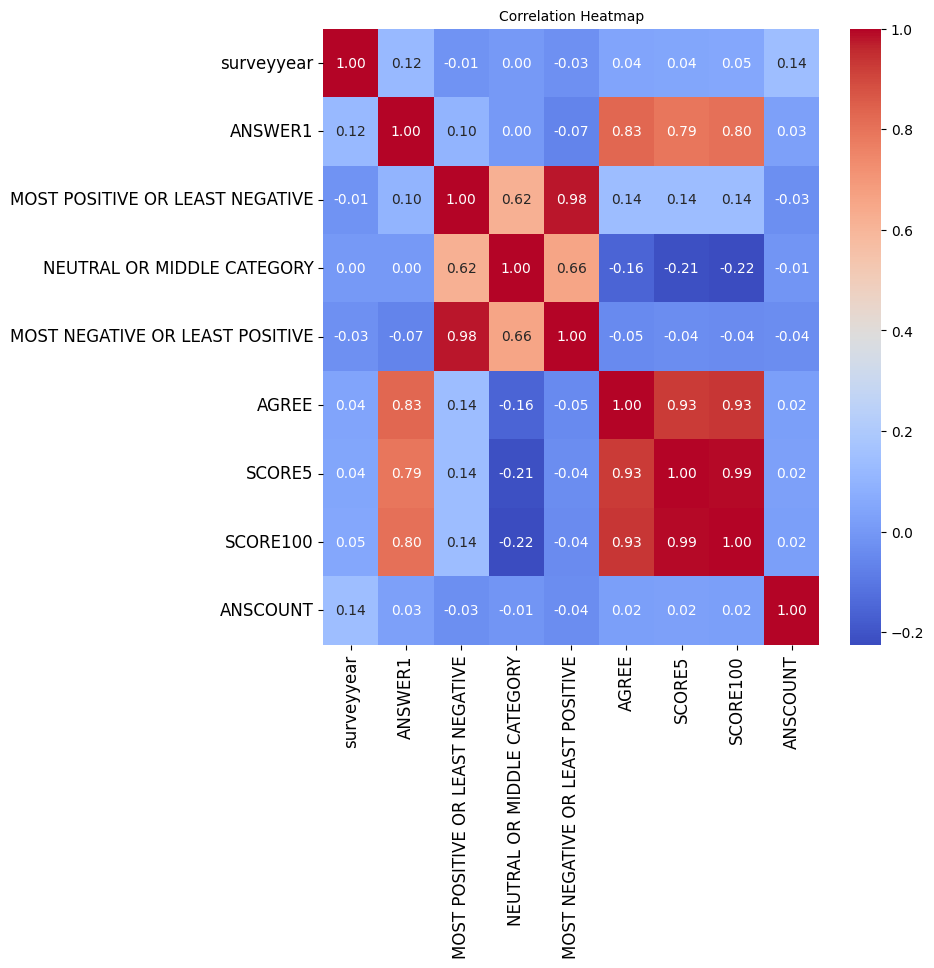

In [15]:
cm=df.select_dtypes(include='number').corr()
plt.figure(figsize=(8, 8))
sns.heatmap(
    cm,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={'size': 10}
)
plt.title("Correlation Heatmap", fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [16]:
label_encoder = LabelEncoder()
df['surveyyear'] = label_encoder.fit_transform(df['surveyyear'])
df['DEPT_E'] = label_encoder.fit_transform(df['DEPT_E'])
df['Question'] = label_encoder.fit_transform(df['Question'])


In [17]:
X = df[['surveyyear', 'DEPT_E', 'Question',]]
y = df['SCORE100']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 4.2 Random Forest

In [18]:
rf = RandomForestRegressor(n_estimators=200, random_state=42,oob_score=True)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")



Training Mean Squared Error (MSE): 17.2132
Test Mean Squared Error (MSE): 35.4372
Training R² Score: 0.9347
Test R² Score: 0.8684


In [19]:
rf.oob_score_

0.8786022369523452

In [20]:
{c: i for c, i in zip(X.columns, rf.feature_importances_)}

{'surveyyear': np.float64(0.1932736964699739),
 'DEPT_E': np.float64(0.057174429291804905),
 'Question': np.float64(0.7495518742382211)}

In [21]:
rf.feature_importances_.sum()

np.float64(0.9999999999999999)

## 4.3 Decision Tree

In [22]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)


y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")



Training Mean Squared Error (MSE): 14.8839
Test Mean Squared Error (MSE): 42.8543
Training R² Score: 0.9436
Test R² Score: 0.8409


/var/folders/v0/7jgd2d892z755l_wfs180km80000gn/T/ipykernel_15055/1577101010.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


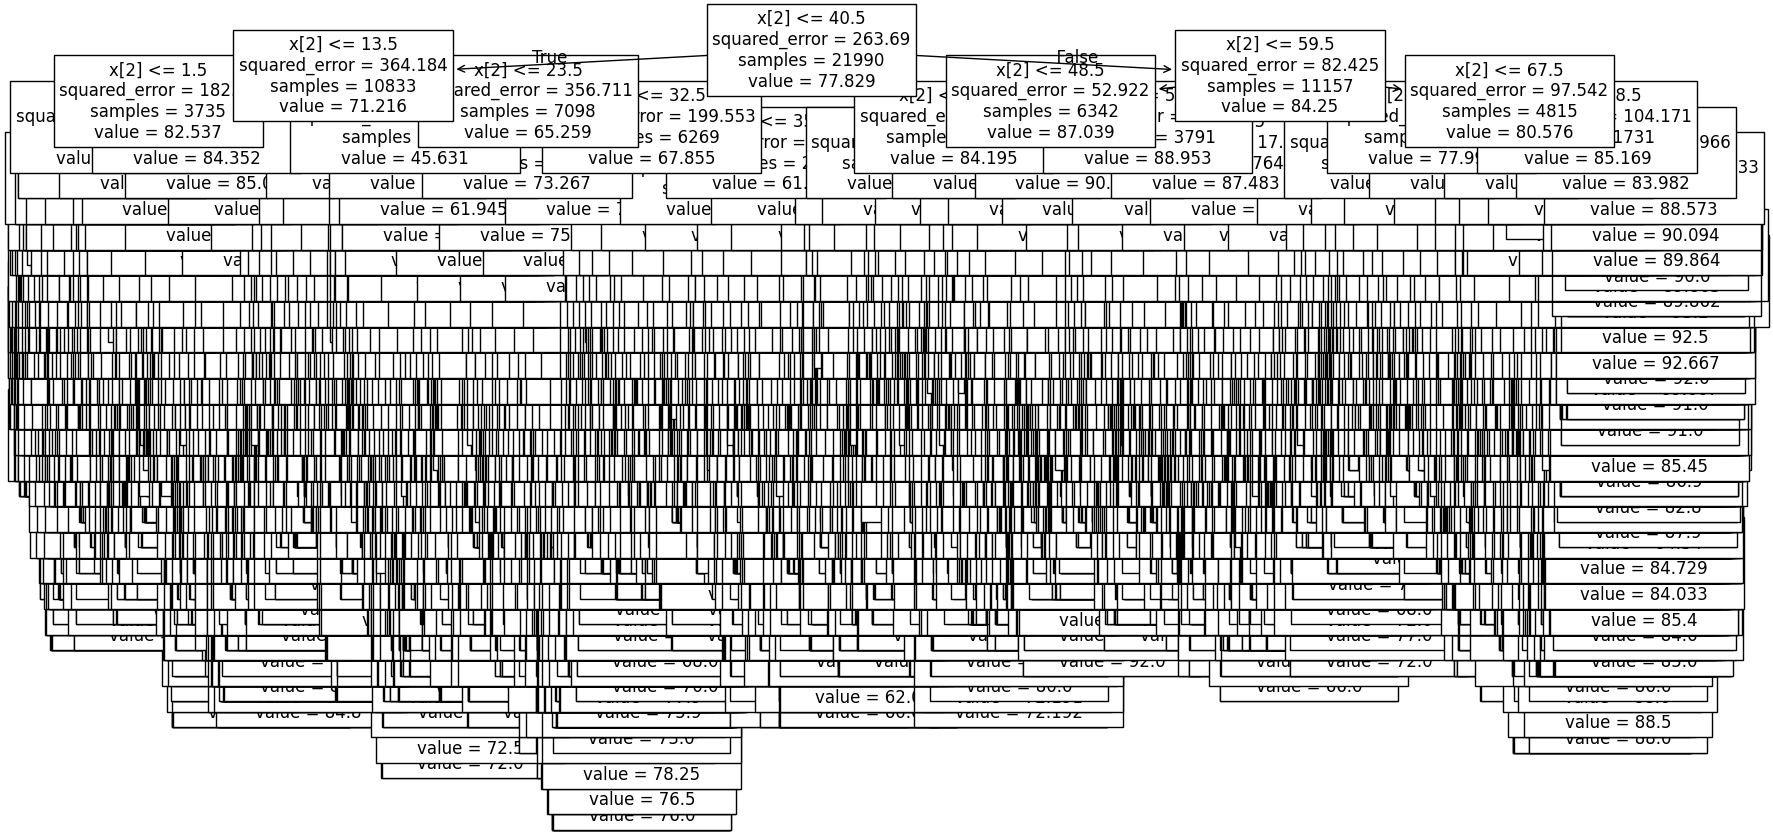

In [23]:
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
plot_tree(dt, ax=ax, fontsize=12);
fig.show()

## 4.4 Hyperparameter Tuning

To achieve optimal model performance, we aim to fine-tune hyperparameters using two robust search techniques:  

1. **GridSearchCV** – A systematic approach that **exhaustively searches** through a predefined set of hyperparameter values. This method ensures that we explore all possible combinations, making it ideal when we have a relatively small search space and sufficient computational resources.  

2. **RandomSearchCV** – A more **efficient alternative** that randomly samples a subset of hyperparameter combinations. This approach is useful when dealing with **large search spaces**, as it significantly reduces computational time while still providing high-quality tuning results.  

By leveraging both methods, we balance **comprehensive exploration** (GridSearch) and **computational efficiency** (RandomSearch) to achieve the best possible model performance.

### 4.4.1 GridSearchCV

In [24]:
param_grid = {
    'max_depth': [5, 10, 15,20,25,30],
    "min_samples_split": [5, 10, 15, 20, 25, 30],
    "min_samples_leaf": [5, 10, 15, 20, 25, 30]
}
search = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid, scoring="neg_mean_squared_error", cv=10)
search.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30],
                         'min_samples_split': [5, 10, 15, 20, 25, 30]},
             scoring='neg_mean_squared_error')

In [25]:
search.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 15}

/var/folders/v0/7jgd2d892z755l_wfs180km80000gn/T/ipykernel_15055/4093123428.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


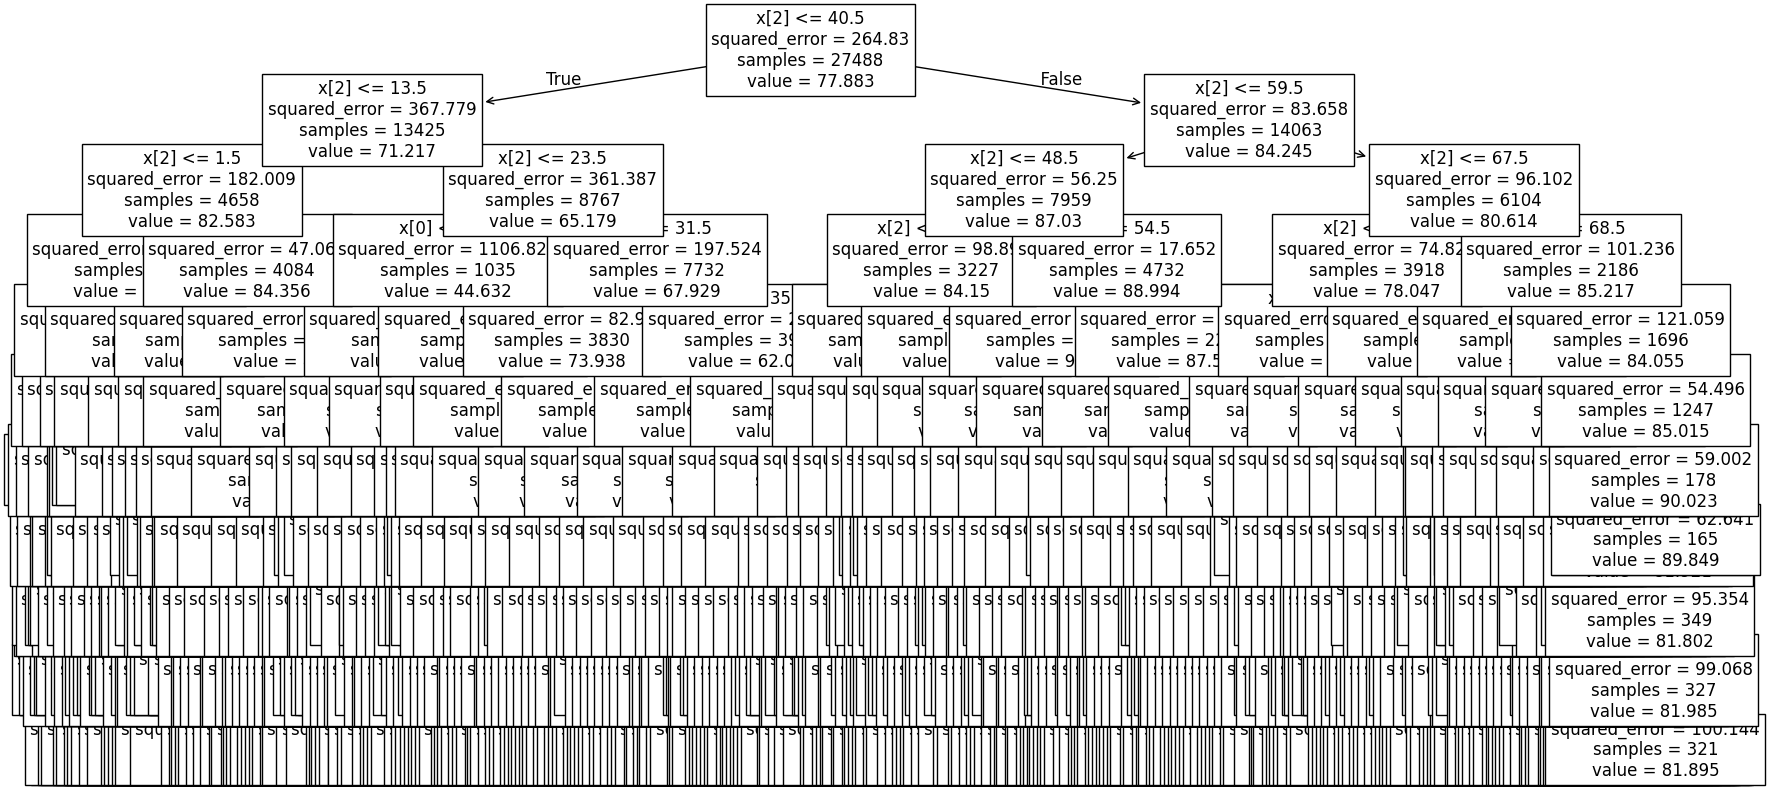

In [26]:
model = search.best_estimator_
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
plot_tree(model, ax=ax, fontsize=12);
fig.show()

#### **Train the Model with Best Parameters (GridSearchCV)**

In [27]:
#GridSearchCV

dt = DecisionTreeRegressor(random_state=42,max_depth= 10, min_samples_leaf= 30, min_samples_split= 20)
dt.fit(X_train, y_train)


y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")


Training Mean Squared Error (MSE): 36.4402
Test Mean Squared Error (MSE): 41.7276
Training R² Score: 0.8618
Test R² Score: 0.8451


### 4.4.2 RandomSearchCV

In [28]:
search = RandomizedSearchCV(DecisionTreeRegressor(), param_distributions=param_grid, scoring="neg_mean_squared_error", cv=10, random_state=42)
search.fit(X, y)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [5, 10, 15, 20, 25,
                                                             30],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              30]},
                   random_state=42, scoring='neg_mean_squared_error')

In [29]:
search.best_params_

{'min_samples_split': 5, 'min_samples_leaf': 30, 'max_depth': 20}

/var/folders/v0/7jgd2d892z755l_wfs180km80000gn/T/ipykernel_15055/4093123428.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


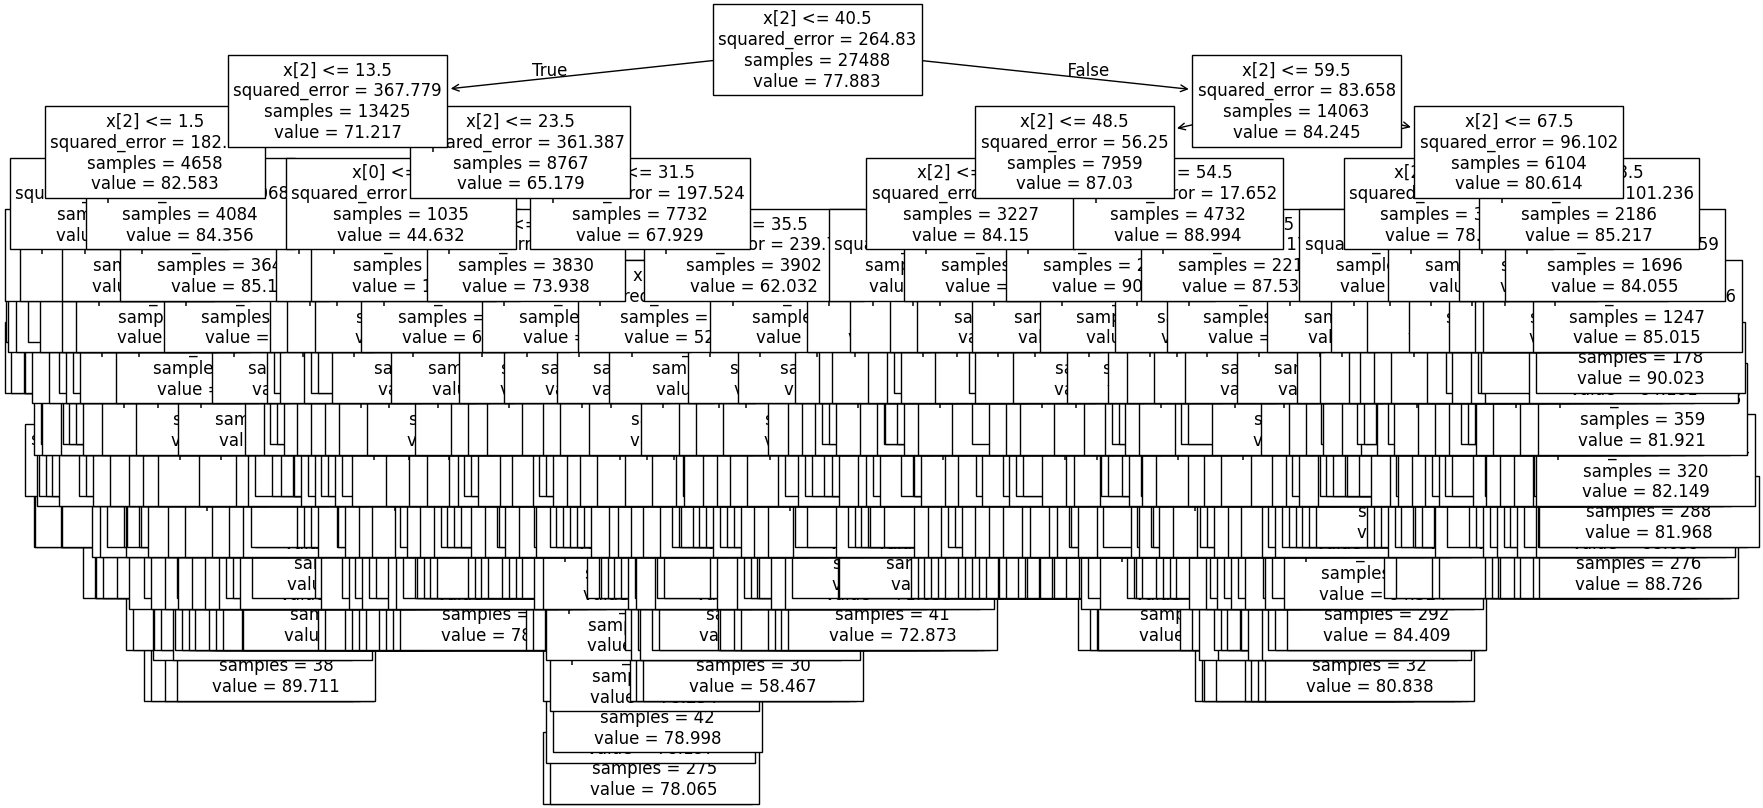

In [30]:
model = search.best_estimator_
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
plot_tree(model, ax=ax, fontsize=12);
fig.show()

#### **Train the Model with Best Parameters (RandomSearchCV)**

In [31]:
#RandomSearchCV
dt = DecisionTreeRegressor(random_state=42,max_depth= 25, min_samples_leaf= 5, min_samples_split= 15)
dt.fit(X_train, y_train)


y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")



Training Mean Squared Error (MSE): 26.6662
Test Mean Squared Error (MSE): 39.0364
Training R² Score: 0.8989
Test R² Score: 0.8551


### **Key Findings**  

#### **Model Performance Comparison**  

| Model                        | Train R² | Test R² | Train MSE | Test MSE |
|------------------------------|---------|--------|-----------|----------|
| Decision Tree (Baseline)     | 0.94    | 0.84   | 14.8      | 42.8     |
| GridSearchCV-Tuned DT        | 0.86    | 0.84   | 36.4      | 41.7     |
| RandomSearchCV-Tuned DT      | 0.89    | 0.85   | 26.6      | 39.0     |
| Random Forest                | 0.93    | 0.86   | 17.2      | 35.4     |

- **Baseline Decision Tree:** High train R² (0.94) but lower test R² (0.84), indicating overfitting. Hyperparameter tuning mitigated this issue.  
- **Random Forest:** Achieved the best test performance (**R² = 0.86, MSE = 35.4**), demonstrating robustness through ensemble learning and **OOB validation (OOB Score = 0.87)**.  

#### **Feature Importance**  

| Feature            | Importance |
|--------------------|------------|
| Question Responses | 0.75       |
| Survey Year       | 0.19       |
| Department        | 0.06       |

- **Question Responses (75%)**: The strongest predictor, indicating that **survey questions** (e.g., service quality, communication) drive **SCORE100**.  
- **Survey Year (19%)**: Suggests that **yearly trends (e.g., policy changes)** influence scores.  
- **Department (6%)**: Minimal impact, implying **departmental differences do not significantly affect satisfaction scores**.  

#### **Implications of Results**  

1. **Focus on Key Survey Questions**  
   - Departments should prioritize **areas tied to high-impact survey questions** (e.g., service quality, communication).  

2. **Address Yearly Trends**  
   - Yearly fluctuations suggest departments should monitor and adapt to **policy changes impacting scores**.  

3. **Departmental Neutrality**  
   - Minimal department impact implies **satisfaction ratings are consistent across departments**.  

#### **Limitations**  

- **Limited predictor variables** available for regression modeling.  

#### **Future Extensions**  

- Test **gradient-boosted trees (e.g., XGBoost)** or **neural networks** for improved performance.  
- Incorporate **additional predictors** if the dataset is updated.  


#### **Conclusion**  

The **Random Forest model** provided the **most reliable predictions** for **SCORE100**, with **survey question responses being the strongest predictor**. Hyperparameter tuning improved decision tree generalization, reducing overfitting. **Random Forest outperformed other models** in accuracy and robustness.

## 4.5 GLM

A **Generalized Linear Model (GLM)** extends linear regression to support **non-Gaussian distributions** using a **link function**. It is widely used for **classification, regression, and count predictions**.  

### **Evaluating GLMs for SCORE100**  

#### **Analysis of Binomial, Poisson, and Negative Binomial Models**  

This section assesses the suitability of **binomial, Poisson, and negative binomial** GLMs for predicting **SCORE100** (ranging from 0 to 100). These models assume different data structures (binary or count-based), which do not align with the continuous nature of SCORE100, making them suboptimal choices.  

### **Methodology Overview**  

#### **Models Used**  

- **Binomial GLM**  
  - Requires a **cbind(successes, failures)** format, applicable for binary outcomes.  

- **Poisson GLM**  
  - Assumes **count data with no upper bound**.  

- **Negative Binomial GLM**  
  - Similar to Poisson but allows for **over-dispersion**.  



### Code Written in R (For Reference)


### **Limitations**  

Since **SCORE100 is neither binary nor strictly count-based**, these GLMs are not appropriate for modeling this target variable.  

### **Conclusion**  

The **binomial, Poisson, and negative binomial** GLMs are not well-suited for a **bounded satisfaction score** (0–100). Given these limitations, **regression models like Decision Trees or Random Forests** (as used previously) are **better alternatives** for predicting SCORE100.

# 5. Conclusion & Discussion

## Summary of Findings

The project analyzed the **2022 Student Exit Survey** data with rigorous data cleaning, exploratory analysis, hypothesis testing, and predictive modeling. Key findings are as follows:

- **Data Preparation & EDA:**
  - Missing and placeholder values were identified and removed, and data types were checked to provide a robust dataset for analysis.
  
- **Skill Development & Networking:**
- Provinces were compared based on skill development and career networking opportunities. **Newfoundland & Labrador, British Columbia, and Alberta** performed best, and **Saskatchewan** performed worst. Normalization was applied to allow for more equitable comparisons among provinces.
  
- **Hiring Prospects:**
- An international vs. national student comparison revealed that international students had a slightly higher score in hiring (77.69) compared to national students (75.67), which suggests that factors like networking and prior work experience could provide them with a slight advantage.

- **Onboarding Experience & Career Intent:**
- Analysis of Q5 items established that most of the onboarding factors were almost uncorrelated with career intention. However, the job-specific orientation (Q5f) was moderately correlated with career intention, indicating a potential role it might play in choosing to begin a federal career.

- **Departmental Analysis Using SCORE100:**
- Stratified sampling of SCORE100 (mean = 82.34) across five federal departments revealed some variation. **Canada Revenue Agency (CRA)** scored the highest, and **Department of National Defence (DND)** scored the lowest.
- ANOVA tests of onboarding (Q5), job satisfaction (Q7), and health and safety (Q11) generally did not yield significant differences between departments, which points to homogeneity in these aspects.
- For work structure (Q8), all but Q8g were non-significant, which reported significant differences that included **Parks Canada (PC)**.

- **Predictive Modeling:**
  - Testing of model performance indicated that the **Random Forest** model produced the strongest predictions for SCORE100 with a test R² of 0.86 and a test MSE of 35.4.
- Feature importance analysis revealed that **responses to survey questions (75%)** were the most important drivers of SCORE100, followed by **survey year (19%)** and **department (6%)**.
- Alternative modeling with GLMs (binomial, Poisson, negative binomial) was unsuitable for SCORE100 due to its bounded nature, validating the use of regression models like Decision Trees and Random Forests.

## Implications

- **Policy & Process Improvement:**
- Stability of job satisfaction and health and safety across departments means that existing support systems are generally effective overall. However, the significant finding in work structure (Q8g) does identify certain areas that may need improvement, namely at **Parks Canada**.

- **Targeted Interventions:**
- Improved job-specific orientation procedures (as assessed by Q5f) would most likely positively impact career intent among student employees.
- The minute advantage for international students in employability outcomes allows recruitment practices to be maximized through leveraging this learning.

- **Insights Through Predictive Modeling:**
- The improved predictive ability of the Random Forest model highlights the advantage of ensemble approaches to predict satisfaction ratings. Organizations can leverage such models for forecasting as well as strategic planning in the field of human resource management.

## Limitations

- **Limitations Imposed by Data Set:**
- The scope of analysis was constrained by the number of predictor variables, which could limit the range of conclusions.
- Self-report survey data is subject to biases that might influence the results.

- **Modeling Challenges:**
- The boundedness of SCORE100 makes it difficult for some modeling techniques (e.g., GLMs), emphasizing the necessity for other methods.

## Future Directions

- **Incorporation of Additional Variables:**
- Future studies could include metrics such as tenure, and position to better capture the complexity of student employee experiences.

- **Alternative Modeling Techniques:**
  - Examining gradient-boosted trees (e.g., XGBoost) or neural networks could uncover non-linear interactions and further improve predictive accuracy.

- **Sector-Specific Analysis:**
- Future research could examine sectoral patterns across provinces and consider the impact of external drivers like visa policy on job opportunities.

## Conclusion

The project offers a comprehensive review of the federal public service student work experience, highlighting both the strengths and areas for improvement. The results show that most areas—e.g., job satisfaction and health and safety—are similar across departments, whereas some areas such as work structure and onboarding orientation show areas of targeted improvement. The positive application of predictive models, especially Random Forests, shows how data-based decision-making could be applied to human resource planning. Despite some confines, the outcome of this research presents useful points of reference for future policy improvements and support to student employees.


# 6. Task Division & Group Collaboration

**1. Rahul**  
- **Project Proposal**  
  * Contributed to the project overview and defined the objectives.
- **Project Presentation**  
  * Created presentation slides for EDA and Hypothesis Testing (Statistical Tests).
  * Presented the EDA (2nd part) during the presentation and the results of statistical tests.
- **Project Report**  
  * Defined the project problem and hypotheses with statistical relevance.  
  * Conducted and documented the hypothesis testing section.
  * Contributed to organizing and structuring the final report.  


**2. Harsha**  
- **Project Proposal**  
  * Completed the Dataset Description section.
- **Project Presentation**  
  * Created Data Description slides
  * Presented the Key feautures of data and overview on Survey Question used for during data collection.
- **Project Report**
  * Conducted and documented the exploratory data analysis (EDA).  
  * Assisted with hypothesis formulation and statistical problem identification.  
  * Contributed to report writing and ensured proper code implementation.  


**3. Ojas**  
- **Project Proposal**  
  * Ensured the dataset is pertinent and from an authorized source.  
- **Project Presentation**  
  * Presented findings from exploratory data analysis (EDA).  
  * Presented the EDA (1st part) during the presentation and the results of statistical tests.
- **Project Report**  
  * Conducted and documented the exploratory data analysis (EDA).  
  * Assisted with hypothesis formulation and statistical problem identification.  
  * Contributed to report writing and ensured proper code implementation.


**4. Lalith**  
- **Project Proposal**  
  * Assisted in defining the statistical problem and hypotheses.  
- **Project Presentation**  
  * Explained the connection between the hypotheses and the dataset.  
  * Linked the problem statement to relevant statistical concepts.  
- **Project Report**  
  * Communicated statistical analysis and interpretation of machine learn modelling.
  * Optimized a best Random Forest model through Random Search and Grid Search cross validation.
  * Assisted in organizing the final report and ensuring clarity.  


**5. Vrinda**  
- **Project Proposal**  
  * Completed the Introduction Section. 
- **Project Presentation**  
  * Communicated statistical analysis and interpretation of results.  
- **Project Report**  
  * Conducted statistical analysis using grouping, regression, and hypothesis testing.  
  * Forwarded the EDA and statistical findings to teammates responsible for modeling.
  * Collaborated on writing and/or editting the introduction, and task division sections.
  * Contributed to assembling the final report, ensuring completeness and clarity.



# 7. Reference
[1] Government of Canada, “2022 Student Exit Survey,” Open Government Portal. [Online]. Available: https://open.canada.ca/data/en/dataset/ea84e298-0cd1-401b-bf99-a9a0b56119f0?utm_source=chatgpt.com. [Accessed: January. 31, 2025].​

[2] Government of Canada, Treasury Board Secretariat, “More information: Student Exit Survey,” Canada.ca. [Online]. Available: https://www.canada.ca/en/treasury-board-secretariat/services/innovation/student-experience-survey/more-information-student-exit-survey.html. [Accessed: January. 31, 2025].​